In [2]:
# 1.2 preprocessing
# mean removal
import numpy as np
from sklearn import preprocessing
data = np.array([[3,  -1.5,    2,  -5.4], [0,    4,    -0.3,  2.1], [1,    3.3, -1.9, -4.3]])
data_standardized = preprocessing.scale(data)
print("Mean =", data_standardized.mean(axis=0))
print("Std deviation =", data_standardized.std(axis=0))

Mean = [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
Std deviation = [1. 1. 1. 1.]


In [3]:
# Scaling
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) 
data_scaled = data_scaler.fit_transform(data)
print("Min max scaled data =\n", data_scaled)

Min max scaled data =
 [[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


In [4]:
# Normalization
data_normalized = preprocessing.normalize(data, norm='l1') 
print("L1 normalized data =\n", data_normalized)

L1 normalized data =
 [[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


In [5]:
# Binarization
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data) 
print("Binarized data =\n", data_binarized)

Binarized data =
 [[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


In [6]:
# One-Hot Encoding
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print("Encoded vector =\n", encoded_vector)

Encoded vector =
 [[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


In [7]:
# 1.2 label encoding
# class mapping
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']
label_encoder.fit(input_classes)
print("Class mapping:")
for i, item in enumerate(label_encoder.classes_):
        print(item, '-->', i)

Class mapping:
audi --> 0
bmw --> 1
ford --> 2
toyota --> 3


In [8]:
# class mapping 2
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print("Labels =", labels)
print("Encoded labels =", list(encoded_labels))

Labels = ['toyota', 'ford', 'audi']
Encoded labels = [3, 2, 0]


In [9]:
# class mapping 3
encoded_labels = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(encoded_labels) 
print("Encoded labels =", encoded_labels) 
print("Decoded labels =", list(decoded_labels))

Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['ford', 'bmw', 'audi', 'toyota', 'bmw']


/Users/lijinjin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<_io.TextIOWrapper name='data_singlevar.txt' mode='r' encoding='UTF-8'>


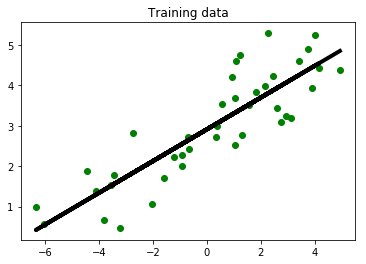

In [23]:
# 1.4 linear regression
import numpy as np
filename = 'data_singlevar.txt'
X = []
y = []
with open(filename, 'r') as f:
    print(f)
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
# training dataset
X_train = np.array(X[:num_training]).reshape((num_training,1)) 
y_train = np.array(y[:num_training])
# testing dataset
X_test = np.array(X[num_training:]).reshape((num_test,1)) 
y_test = np.array(y[num_training:])

# linear regresison model
from sklearn import linear_model
# linear regression object
linear_regressor = linear_model.LinearRegression()
# train models
linear_regressor.fit(X_train, y_train)
# check fitness of training set
import matplotlib.pyplot as plt
y_train_pred = linear_regressor.predict(X_train) 
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

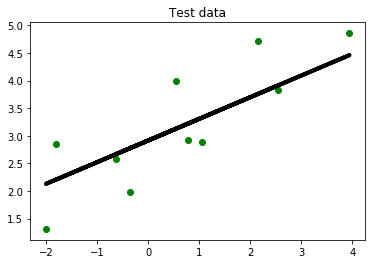

In [11]:
# check fitness of test set
y_test_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

In [12]:
# Measure performance
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2) )
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explain variance score = 0.68
R2 score = 0.68


In [17]:
# ridge regression
import numpy as np
filename = 'data_multivar.txt'
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.split(',')]
        xt, yt = data[:-1], data[-1]
        X.append(xt)
        y.append(yt)
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
# Training data
X_train = np.array(X[:num_training])
y_train = np.array(y[:num_training])
# Test data
X_test = np.array(X[num_training:])
y_test = np.array(y[num_training:])
# Create linear regression object
from sklearn import linear_model
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
# Train the model using the training sets
ridge_regressor.fit(X_train, y_train)
# Predict the output
y_test_pred_ridge = ridge_regressor.predict(X_test)
# Measure performance
import sklearn.metrics as sm
print("RIDGE:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

RIDGE:
Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explained variance score = 0.84
R2 score = 0.83


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82
#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


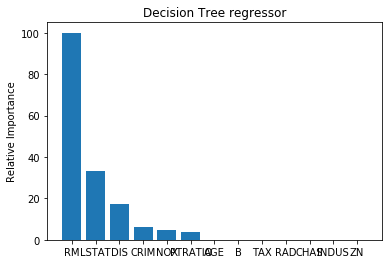

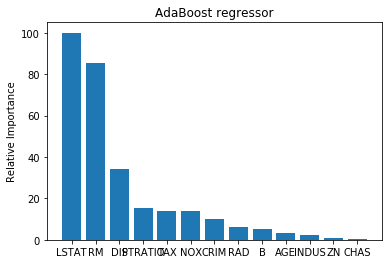

In [36]:
# 1.9 house pricing prediction (Decission Tree Vs. AdaBoost)
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()
if __name__=='__main__':
    # Load housing data
    housing_data = datasets.load_boston() 
    # Shuffle the data
    X, y = shuffle(housing_data.data, housing_data.target, random_state=7)
    # Split the data 80/20 (80% for training, 20% for testing)
    num_training = int(0.8 * len(X))
    X_train, y_train = X[:num_training], y[:num_training]
    X_test, y_test = X[num_training:], y[num_training:]
    # Fit decision tree regression model
    dt_regressor = DecisionTreeRegressor(max_depth=4)
    dt_regressor.fit(X_train, y_train)
    # Fit decision tree regression model with AdaBoost
    ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
    ab_regressor.fit(X_train, y_train)
    # Evaluate performance of Decision Tree regressor
    y_pred_dt = dt_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_dt)
    evs = explained_variance_score(y_test, y_pred_dt) 
    print("#### Decision Tree performance ####")
    print("Mean squared error =", round(mse, 2))
    print("Explained variance score =", round(evs, 2))
    # Evaluate performance of AdaBoost
    y_pred_ab = ab_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_ab)
    evs = explained_variance_score(y_test, y_pred_ab) 
    print("#### AdaBoost performance ####")
    print("Mean squared error =", round(mse, 2))
    print("Explained variance score =", round(evs, 2))
    # Plot relative feature importances 
    plot_feature_importances(dt_regressor.feature_importances_, 
            'Decision Tree regressor', housing_data.feature_names)
    plot_feature_importances(ab_regressor.feature_importances_, 
            'AdaBoost regressor', housing_data.feature_names)


#### Random Forest regressor performance ####
Mean squared error = 351494.59
Explained variance score = 0.9


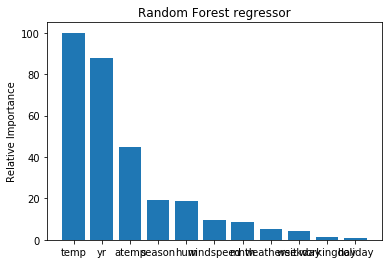

In [48]:
# 1.11 Sharing bike
import csv
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from housing import plot_feature_importances

def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'r'), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[2:13])
        y.append(row[-1])
    # Extract feature names
    feature_names = np.array(X[0])
    # Remove the first row because they are feature names
    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

if __name__=='__main__':
    # Load the dataset from the input file
    X, y, feature_names = load_dataset('bike_day.csv')
    X, y = shuffle(X, y, random_state=7) 

    # Split the data 80/20 (80% for training, 20% for testing)
    num_training = int(0.9 * len(X))
    X_train, y_train = X[:num_training], y[:num_training]
    X_test, y_test = X[num_training:], y[num_training:]
    
    # Fit Random Forest regression model
    rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
    rf_regressor.fit(X_train, y_train)
    
    # Evaluate performance of Random Forest regressor
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred) 
    print("\n#### Random Forest regressor performance ####")
    print("Mean squared error =", round(mse, 2))
    print("Explained variance score =", round(evs, 2))
    
    # Plot relative feature importances 
    plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_names)